In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
ss = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

In [3]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train_image = train.iloc[:, 1:].values.reshape(-1, 28, 28, 1)
train_label = train['label'].values

print(train_label)

[1 0 1 ... 7 6 9]


In [5]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(train_image, train_label, test_size=0.20, random_state=0)

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(33600, 28, 28, 1) (33600,)
(8400, 28, 28, 1) (8400,)


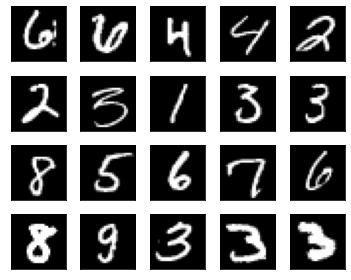

In [6]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.savefig('train_mnist.png', dpi=300)

In [7]:
from tensorflow.keras.utils import to_categorical

x_train = x_train.astype('float32') / 255
x_valid = x_valid.astype('float32') / 255

y_train = to_categorical(y_train, num_classes=10)
y_valid= to_categorical(y_valid, num_classes=10)

print(x_train.shape)
print(x_valid.shape)
print(x_train.min(), x_train.max())

(33600, 28, 28, 1)
(8400, 28, 28, 1)
0.0 1.0


In [8]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [9]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=192, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=192, kernel_size=5, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2, padding='same'))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

2023-01-18 16:34:36.384352: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 16:34:36.654344: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 16:34:36.655175: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-18 16:34:36.656736: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 192)       221376    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 192)         0

In [11]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.3, verbose=1, patience=2, min_lr=0.00000001)

2023-01-18 16:34:39.710340: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2023-01-18 16:34:41.163619: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


269/269 [==============================] - 13s 21ms/step - loss: 0.2306 - accuracy: 0.9260 - val_loss: 0.0645 - val_accuracy: 0.9810
Epoch 2/20
269/269 [==============================] - 5s 19ms/step - loss: 0.0484 - accuracy: 0.9853 - val_loss: 0.0592 - val_accuracy: 0.9829
Epoch 3/20
269/269 [==============================] - 5s 19ms/step - loss: 0.0328 - accuracy: 0.9895 - val_loss: 0.0639 - val_accuracy: 0.9853
Epoch 4/20
269/269 [==============================] - 5s 20ms/step - loss: 0.0255 - accuracy: 0.9917 - val_loss: 0.0503 - val_accuracy: 0.9859
Epoch 5/20
269/269 [==============================] - 5s 19ms/step - loss: 0.0178 - accuracy: 0.9946 - val_loss: 0.0476 - val_accuracy: 0.9869
Epoch 6/20
269/269 [==============================] - 5s 19ms/step - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0503 - val_accuracy: 0.9884
Epoch 7/20
269/269 [==============================] - 5s 19ms/step - loss: 0.0138 - accuracy: 0.9952 - val_loss: 0.0681 - val_accuracy: 0.9862
Epoch 8/2

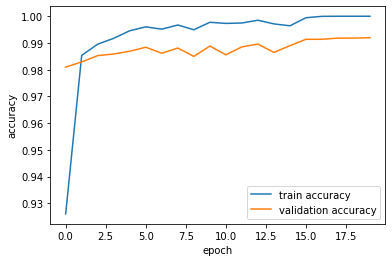

In [12]:
hist = model.fit(x_train, y_train, batch_size = 100, validation_split = 0.2, epochs = 20, verbose=1, callbacks=[reduce_lr], shuffle=True)

plt.plot(hist.history['accuracy'])                                           ## plot accuracy curve during training 
plt.plot(hist.history['val_accuracy'])
plt.legend(['train accuracy','validation accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [13]:
score = model.evaluate(x_valid, y_valid, verbose=0)
print('loss ', score[0])
print('accuracy ', score[1])

loss  0.03820495679974556
accuracy  0.9928571581840515


In [14]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
test_image = test.values.reshape(-1, 28, 28, 1)
print(test_image.shape)

(28000, 28, 28, 1)


In [16]:
predicted_classes = model.predict(x_valid)
predicted_classes = np.argmax(predicted_classes, axis=-1)
y_true = np.argmax(y_valid, axis=-1)

correct = np.nonzero(predicted_classes == y_true)[0]        ## เปรียบเทียบค่า
incorrect = np.nonzero(predicted_classes != y_true)[0]
print('Correct predicted classes: ', correct.shape[0])
print('Incorrect predicted classes: ', incorrect.shape[0])

Correct predicted classes:  8340
Incorrect predicted classes:  60


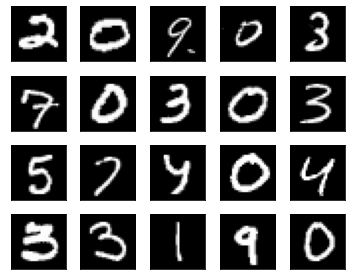

In [17]:
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(test_image[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])    
plt.tight_layout()
plt.savefig('test_mnist.png', dpi=300)

In [18]:
result = model.predict(test_image)
result = np.argmax(result, axis=-1)

print(result)

[2 0 9 ... 3 9 2]


In [19]:
submission = pd.DataFrame({'ImageId': np.arange(1, 28001), 'Label': result})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [20]:
submission.to_csv('/kaggle/working/submission.csv', index=False)